In [ ]:
# Retail Sales and Customer Demographics

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
import sqlite3
import seaborn as sns
import plotly as ply
import plotly.express as px
import statistics as stat
from scipy import stats as scstats
from scipy.stats import pearsonr

In [9]:
# Import CSV file and read

krd = pd.read_csv('Kaggle_retail_demo.csv')
krd

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [11]:
# Make backup of dataframe

krd_copy = krd

In [13]:
# Initial shape

krd.shape

(1000, 9)

In [15]:
# Initial info

krd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [17]:
# Check duplicates

krd.duplicated().sum()

0

In [19]:
# Check for any missing values in the dataset

krd.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [21]:
# Descriptive Statistics

krd.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [23]:
# Check the data types of each column

krd.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [27]:
# Change "Premiere" type to date

krd['Date'] = pd.to_datetime(krd['Date'])
krd.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [41]:
# See the total amount spent, by Gender

krd_gen = krd.groupby(['Gender'])[['Total Amount']].agg('sum').reset_index()
krd_gen

,Gender,Total Amount
0,Female,232840
1,Male,223160


In [ ]:
# Female customers spent more than Male customers by about $9k

In [45]:
# See the total number of units purchased, by Gender

krd_genq = krd.groupby(['Gender'])[['Quantity']].agg('sum').reset_index()
krd_genq

,Gender,Quantity
0,Female,1298
1,Male,1216


In [ ]:
# Female customers also bought more units of products

In [43]:
# See the total amount spent, by Product Category

krd_prod = krd.groupby(['Product Category'])[['Total Amount']].agg('sum').reset_index()
krd_prod

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


In [ ]:
# Electronics had the most profit, followed by Clothing then Beauty

In [47]:
# See the total number of units purchased, by Product Cateogry

krd_prodq = krd.groupby(['Product Category'])[['Quantity']].agg('sum').reset_index()
krd_prodq

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [ ]:
# However, Clothing had the most units sold, followed by Electronics then Beauty. 
# This makes sense, as I'd imagine that Electronics generally cost more per unit than Clothing.

In [49]:
# Let's pull the Year out from the Date column

krd['Year'] = krd['Date'].dt.year
krd

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023


In [51]:
# Let's see how many different Years there are

krd['Year'].nunique()

2

In [59]:
# There are 2 different Years

# Let's see the Total Amount and Quantity per each Year

krd.groupby(['Year'])[['Total Amount','Quantity']].agg('sum').reset_index()

,Year,Total Amount,Quantity
0,2023,454470,2510
1,2024,1530,4


In [61]:
# Let's also make a column that has Year_Month as that will make it easier to visualize down the line

krd['Year_Month'] = krd['Date'].dt.to_period('M')
krd

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Year_Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,2023-05
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,2023-05
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,2023-11
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,2023-10
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,2023-12


In [65]:
krd_mon = krd.groupby(['Year_Month'])[['Total Amount','Quantity']].agg('sum').reset_index()
krd_mon

,Year_Month,Total Amount,Quantity
0,2023-01,35450,195
1,2023-02,44060,214
2,2023-03,28990,194
3,2023-04,33870,214
4,2023-05,53150,259
5,2023-06,36715,197
6,2023-07,35465,176
7,2023-08,36960,227
8,2023-09,23620,170
9,2023-10,46580,252


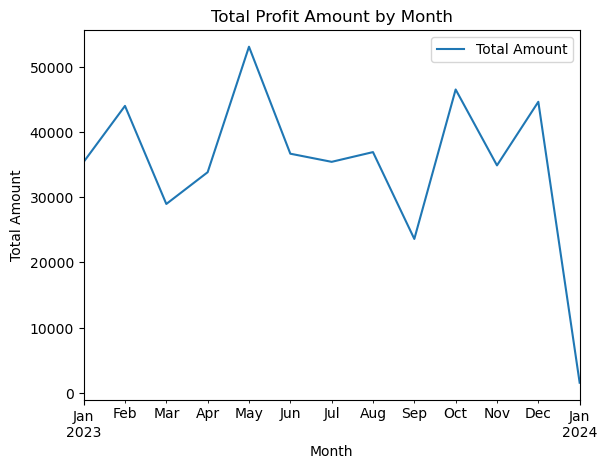

In [75]:
# Let's make a chart to visualize the profit amounts by Month

krd_mon.plot(kind = 'line', x = 'Year_Month', y = 'Total Amount')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Total Profit Amount by Month')
plt.show()

# Looks fairly consistent until a steep drop in January

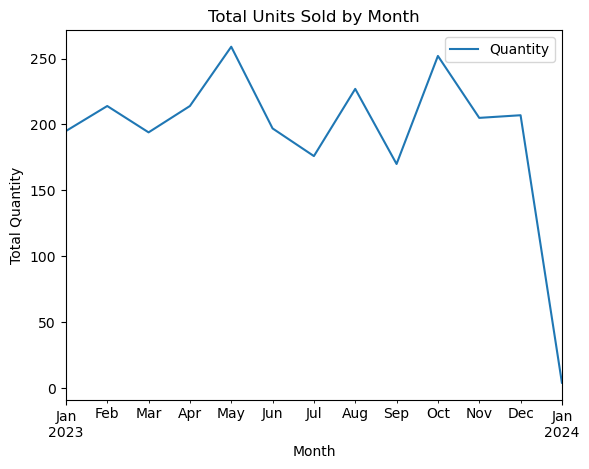

In [77]:
# Now let's do the same with the amount of Units sold

krd_mon.plot(kind = 'line', x = 'Year_Month', y = 'Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Units Sold by Month')
plt.show()

# 

<Axes: xlabel='Product Category', ylabel='Total Amount'>

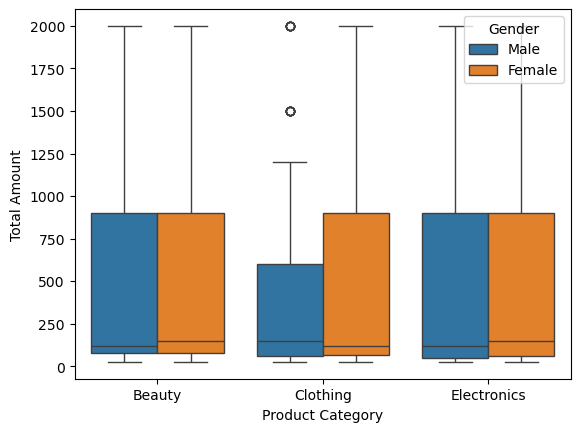

In [81]:
# Let's make a boxplot of Profit by Category and Gender

sns.boxplot(data = krd, x = 'Product Category', y = 'Total Amount', hue = 'Gender')

# Generally, men and women spent the same amount, except when it came to clothing, where women spent more on average (except for
# a couple of outliers on the men's side

<Axes: xlabel='Age', ylabel='Count'>

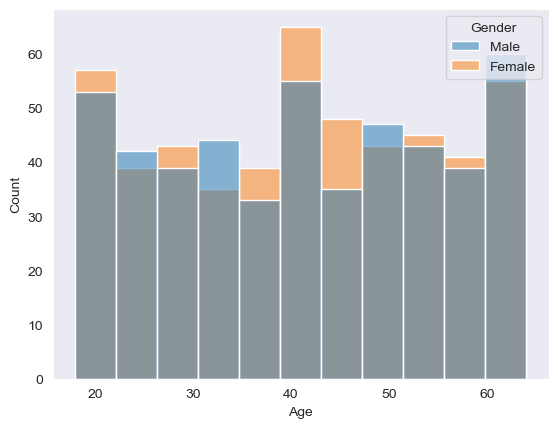

In [83]:
# Let's look at our customer's ages and gender on a histogram

sns.set_style("dark")
sns.histplot(data = krd, x = 'Age', hue = 'Gender')

# Doesn't seem to be much of a trend in terms of age distribution or age by gender